# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import files
uploaded=files.upload()

Saving GermanCredit.csv to GermanCredit.csv


In [130]:
# Your code here! :
import io
df=pd.read_csv(io.BytesIO(uploaded['GermanCredit.csv']))
df.head()



,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CheckingAccountStatus.none,CreditHistory.NoCredit.AllPaid,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical,Purpose.NewCar,Purpose.UsedCar,Purpose.Furniture.Equipment,Purpose.Radio.Television,Purpose.DomesticAppliance,Purpose.Repairs,Purpose.Education,Purpose.Vacation,Purpose.Retraining,Purpose.Business,Purpose.Other,SavingsAccountBonds.lt.100,SavingsAccountBonds.100.to.500,SavingsAccountBonds.500.to.1000,SavingsAccountBonds.gt.1000,SavingsAccountBonds.Unknown,EmploymentDuration.lt.1,EmploymentDuration.1.to.4,EmploymentDuration.4.to.7,EmploymentDuration.gt.7,EmploymentDuration.Unemployed,Personal.Male.Divorced.Seperated,Personal.Female.NotSingle,Personal.Male.Single,Personal.Male.Married.Widowed,Personal.Female.Single,OtherDebtorsGuarantors.None,OtherDebtorsGuarantors.CoApplicant,OtherDebtorsGuarantors.Guarantor,Property.RealEstate,Property.Insurance,Property.CarOther,Property.Unknown,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


In [2]:
df=pd.read_csv("GermanCredit.csv")
df.head()



,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


X=df.drop(['Class'],axis=1)
y=df['Class'].map(dict(Good=1, Bad=0))
X_train,y_train,X_test,y_test= train_test_split(X,y,test_set=.3, startify=y, random_state=1)    
dt=DecisionTreeClassifier(random_state=1)

In [3]:
X=df.drop(['Class'],axis=1)
y=df['Class'].map(dict(Good=1, Bad=0))
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.3,  random_state=1)    
dt=DecisionTreeClassifier(random_state=1)
dt.get_params()

params_dt={'max_depth': [2,3,4,5,6,7,8],
 'max_features': [.2,.3,.4,.5,.6,.7,.8],
 'min_samples_leaf': [.02,.04,.06,.08]
    
}

grid_dt=GridSearchCV(estimator=dt, param_grid=params_dt,scoring='accuracy',cv=10, n_jobs=-1)
grid_dt.fit(X_train,y_train)
best_hyperparam=grid_dt.best_params_
print("Best hperparameters :\n " ,best_hyperparam)

best_cv_score=grid_dt.best_score_
print("Best score :\n " ,best_cv_score)

dt_best_model=grid_dt.best_estimator_
#test accuracy

D_test_acc=dt_best_model.score(X_test,y_test)
print("Test Accuracy  :\n " ,D_test_acc)


Best hperparameters :
  {'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 0.02}
Best score :
  0.7257142857142858
Test Accuracy  :
  0.7333333333333333


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

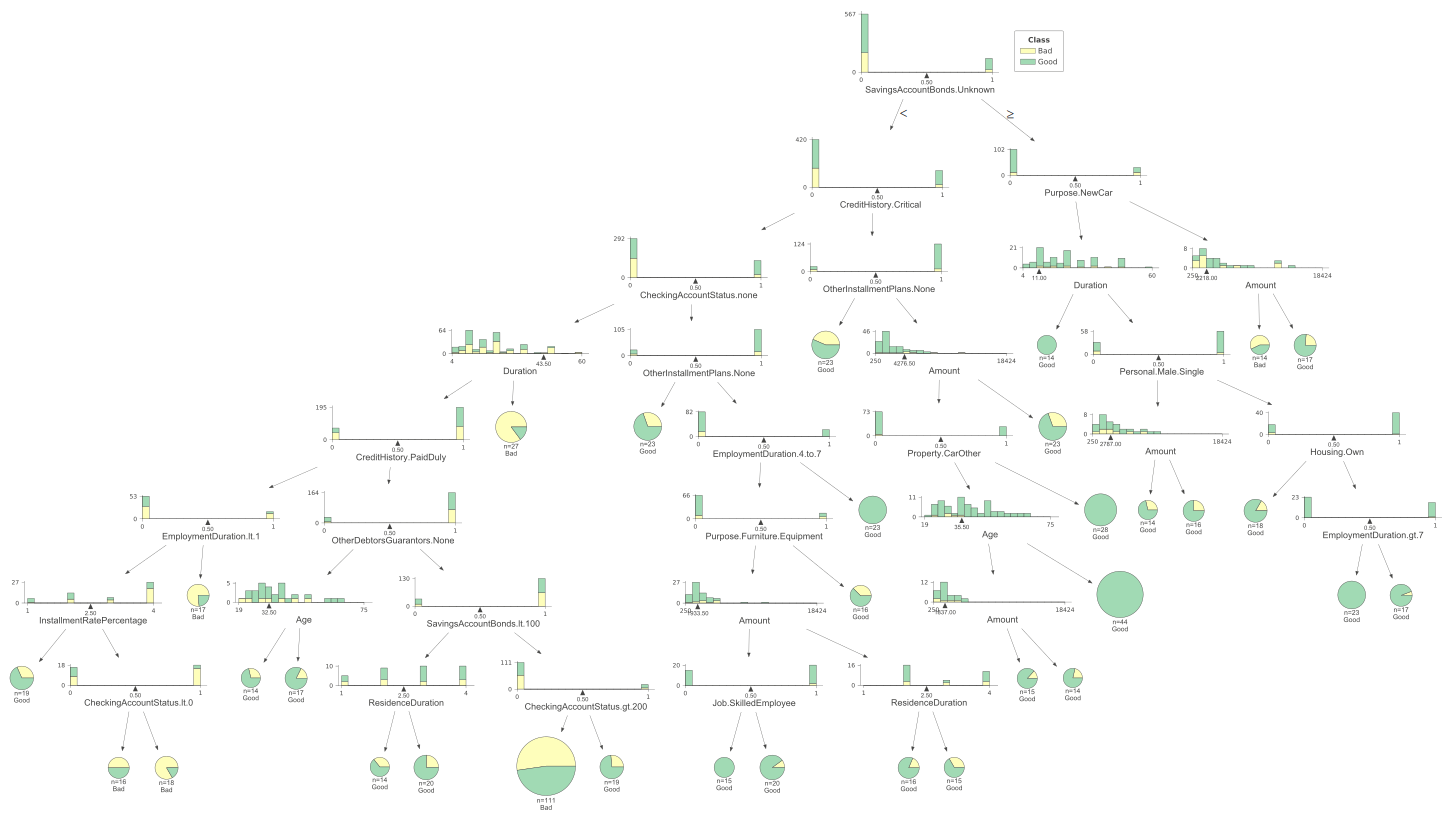

In [5]:
from dtreeviz.trees import *
from dtreeviz.shadow import *
z=X_train.columns
viz = dtreeviz(dt_best_model,
                   X_train,
                  y_train,
                   target_name='Class',
                   feature_names=np.array(X_train.columns),
               class_names={1:'Good',0:'Bad'}
                   )
viz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [10]:
# Your code here! :
import numpy as np
sel = RandomForestClassifier(n_estimators = 100)


params_rf={'n_estimators': np.arange(100,500,50),
 'max_features': ['int', 'float','auto','sqrt','log2'],
 'min_samples_leaf': [2,10,30,40,40]
    
}



grid_rf=GridSearchCV(estimator=sel, param_grid=params_rf,scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
grid_rf.fit(X_train,y_train)




Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  6.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [11]:
rf_best_hyperparam=grid_rf.best_params_
print("Best hperparameters :\n " ,rf_best_hyperparam)

rf_best_cv_score=grid_rf.best_score_
print("Best score :\n " ,best_cv_score)

best_model=grid_rf.best_estimator_
#test accuracy

test_acc=best_model.score(X_test,y_test)
print("Test Accuracy  :\n " ,test_acc)

Best hperparameters :
  {'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 350}
Best score :
  0.7257142857142858
Test Accuracy  :
  0.76


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

Feature ranking:
1. feature Amount (0.103810)
2. feature Duration (0.080713)
3. feature Age (0.079279)
4. feature CheckingAccountStatus.none (0.062114)
5. feature CheckingAccountStatus.lt.0 (0.049936)
6. feature InstallmentRatePercentage (0.040882)
7. feature CreditHistory.Critical (0.035776)
8. feature ResidenceDuration (0.031954)
9. feature SavingsAccountBonds.lt.100 (0.025019)
10. feature CheckingAccountStatus.0.to.200 (0.019597)


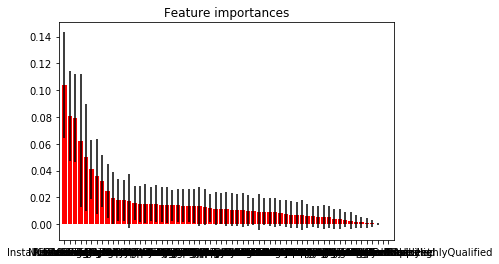

In [89]:
# Your code here



import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


importances = best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
  if f<10:
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
  else:
    exit
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X_train.columns)
plt.xlim([-1, X.shape[1]])
plt.show()

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [88]:
! pip install pdpbox

     |████████████████████████████████| 57.7MB 69kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=915d024cc18924e4709509db3ae537741ade9974eaa8968833645d662a1d9cc5
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

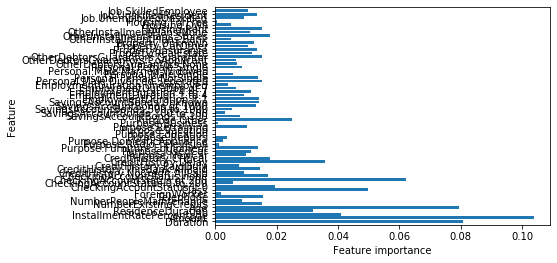

In [106]:
# Your code here!

cc_features = [x for i,x in enumerate(df.columns) ]
def plot_feature_importances(model):
    
    plt.barh(range(X.shape[1]), model.feature_importances_, align='center')
    plt.yticks(np.arange(X.shape[1]), cc_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, X.shape[1])

plot_feature_importances(best_model)
plt.show()

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2194c919f28>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2194dfb9470>})

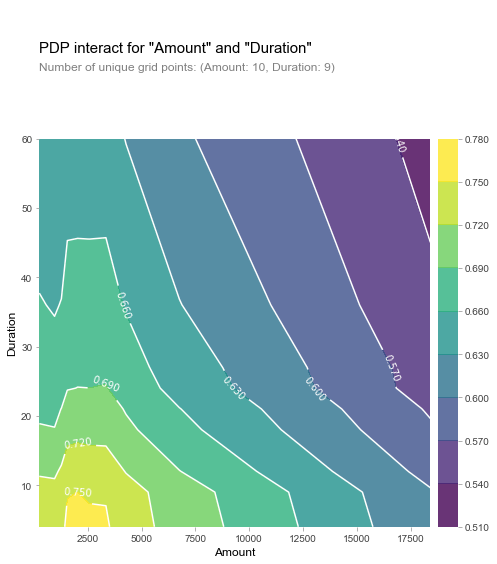

In [11]:
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
#import pickle

# save model to disk
filename = 'model.sav'
#pickle.
dump(best_model, filename)

# load model from disk
best_model = load(filename)
#pickle.load(filename)
df1=df
df1['Class']=df1['Class'].map(dict(Good=1.0, Bad=0.0))

cc = [x for i,x in enumerate(X_train.columns) ]
# test pdpbox
import pdpbox
from pdpbox import pdp
pdp_pedi_insul = pdp.pdp_interact(best_model,X_train,cc,['Amount','Duration'])
pdp.pdp_interact_plot(pdp_pedi_insul, ['Amount','Duration'])

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [12]:
# LGBM

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

param_grid={"colsample_bytree": np.arange(.5, 1,.1),
            "max_depth":np.arange(3,10,1),
            "n_estimators":np.arange(50,1000,50)}

import lightgbm as lgb
from lightgbm import LGBMClassifier
Lmod=LGBMClassifier()
##Lmod.fit(X_train,y_train)

L_grid_mse=GridSearchCV(param_grid=param_grid, estimator=Lmod, cv=4, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
L_grid_mse.fit(x_train,y_train)

print ("RMSE of the model with XGboost is " ,np.sqrt(np.abs(L_grid_mse.best_score_)))


L_best_hyperparam=L_grid_mse.best_params_
print("Best hperparameters XGboost:\n " ,L_best_hyperparam)



L_best_model=L_grid_mse.best_estimator_
#Test accuracy
L_test_acc=L_best_model.score(x_test,y_test)
print("Test Accuracy  :\n " ,L_test_acc)


Fitting 4 folds for each of 665 candidates, totalling 2660 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 250 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 500 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 850 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1300 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1850 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 2500 tasks      | elapsed:  8.8min


RMSE of the model with XGboost is  0.4810702354423639
Best hperparameters XGboost:
  {'colsample_bytree': 0.5, 'max_depth': 4, 'n_estimators': 50}
Test Accuracy  :
  0.76


[Parallel(n_jobs=-1)]: Done 2660 out of 2660 | elapsed:  9.6min finished


In [13]:
# XGBoost
import xgboost as xgb





gbm=xgb.XGBClassifier()

grid_mse=GridSearchCV(param_grid=param_grid, estimator=gbm, cv=4, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_mse.fit(X_train,y_train)

print ("RMSE of the model with XGboost is " ,np.sqrt(np.abs(grid_mse.best_score_)))

xg_best_hyperparam=grid_mse.best_params_
print("Best hperparameters XGboost:\n " ,xg_best_hyperparam)


xg_best_model=grid_mse.best_estimator_
#test accuracy

xg_test_acc=xg_best_model.score(X_test,y_test)
print("Test Accuracy  :\n " ,xg_test_acc)

Fitting 4 folds for each of 665 candidates, totalling 2660 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 2660 out of 2660 | elapsed: 26.0min finished


RMSE of the model with XGboost is  0.4750939756661683
Best hperparameters XGboost:
  {'colsample_bytree': 0.6, 'max_depth': 7, 'n_estimators': 150}
Test Accuracy  :
  0.7433333333333333


In [14]:
#CAT Boost
from catboost import CatBoostClassifier
param_grid1={
            "depth":[7],
            'learning_rate':[0.03], 
          'l2_leaf_reg':[100]}
Cmod=CatBoostClassifier()

C_grid_mse=GridSearchCV(param_grid=param_grid1, estimator=Cmod, cv=4, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
C_grid_mse.fit(x_train,y_train)

print ("RMSE of the model with XGboost is " ,np.sqrt(np.abs(C_grid_mse.best_score_)))

C_best_hyperparam=C_grid_mse.best_params_
print("Best hperparameters XGboost:\n " ,C_best_hyperparam)

C_best_cv_score=C_grid_mse.best_score_
print("Best score Xgbooost:\n " ,C_best_cv_score)

C_best_model=C_grid_mse.best_estimator_
#Test accuracy
C_test_acc=C_best_model.score(x_test,y_test)
print("Test Accuracy  :\n " ,C_test_acc)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   23.0s remaining:   23.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   23.0s finished


0:	learn: 0.6873088	total: 151ms	remaining: 2m 31s
1:	learn: 0.6826293	total: 158ms	remaining: 1m 18s
2:	learn: 0.6788380	total: 165ms	remaining: 54.8s
3:	learn: 0.6719370	total: 168ms	remaining: 41.8s
4:	learn: 0.6672648	total: 174ms	remaining: 34.7s
5:	learn: 0.6637501	total: 181ms	remaining: 30.1s
6:	learn: 0.6613562	total: 191ms	remaining: 27.2s
7:	learn: 0.6579310	total: 198ms	remaining: 24.6s
8:	learn: 0.6516065	total: 203ms	remaining: 22.3s
9:	learn: 0.6490763	total: 211ms	remaining: 20.9s
10:	learn: 0.6448450	total: 218ms	remaining: 19.6s
11:	learn: 0.6419015	total: 225ms	remaining: 18.5s
12:	learn: 0.6389332	total: 232ms	remaining: 17.6s
13:	learn: 0.6360034	total: 238ms	remaining: 16.8s
14:	learn: 0.6339352	total: 245ms	remaining: 16.1s
15:	learn: 0.6317918	total: 251ms	remaining: 15.4s
16:	learn: 0.6292448	total: 258ms	remaining: 14.9s
17:	learn: 0.6261970	total: 264ms	remaining: 14.4s
18:	learn: 0.6239627	total: 271ms	remaining: 14s
19:	learn: 0.6199677	total: 278ms	remaini

175:	learn: 0.4500365	total: 1.38s	remaining: 6.47s
176:	learn: 0.4494767	total: 1.39s	remaining: 6.46s
177:	learn: 0.4486722	total: 1.4s	remaining: 6.45s
178:	learn: 0.4480754	total: 1.4s	remaining: 6.44s
179:	learn: 0.4474858	total: 1.41s	remaining: 6.43s
180:	learn: 0.4470558	total: 1.41s	remaining: 6.4s
181:	learn: 0.4466106	total: 1.42s	remaining: 6.38s
182:	learn: 0.4460879	total: 1.43s	remaining: 6.36s
183:	learn: 0.4454605	total: 1.43s	remaining: 6.35s
184:	learn: 0.4448478	total: 1.44s	remaining: 6.33s
185:	learn: 0.4443912	total: 1.44s	remaining: 6.32s
186:	learn: 0.4437047	total: 1.45s	remaining: 6.3s
187:	learn: 0.4431166	total: 1.45s	remaining: 6.28s
188:	learn: 0.4426191	total: 1.46s	remaining: 6.26s
189:	learn: 0.4419110	total: 1.47s	remaining: 6.25s
190:	learn: 0.4414028	total: 1.47s	remaining: 6.24s
191:	learn: 0.4409184	total: 1.48s	remaining: 6.22s
192:	learn: 0.4404010	total: 1.48s	remaining: 6.2s
193:	learn: 0.4397085	total: 1.49s	remaining: 6.19s
194:	learn: 0.439

346:	learn: 0.3714235	total: 2.43s	remaining: 4.57s
347:	learn: 0.3711455	total: 2.44s	remaining: 4.56s
348:	learn: 0.3708569	total: 2.44s	remaining: 4.55s
349:	learn: 0.3704328	total: 2.45s	remaining: 4.55s
350:	learn: 0.3702192	total: 2.46s	remaining: 4.54s
351:	learn: 0.3697544	total: 2.46s	remaining: 4.53s
352:	learn: 0.3693765	total: 2.47s	remaining: 4.53s
353:	learn: 0.3689796	total: 2.48s	remaining: 4.52s
354:	learn: 0.3684956	total: 2.48s	remaining: 4.51s
355:	learn: 0.3680998	total: 2.49s	remaining: 4.5s
356:	learn: 0.3677372	total: 2.49s	remaining: 4.49s
357:	learn: 0.3673095	total: 2.5s	remaining: 4.48s
358:	learn: 0.3666706	total: 2.5s	remaining: 4.47s
359:	learn: 0.3662042	total: 2.51s	remaining: 4.46s
360:	learn: 0.3658692	total: 2.52s	remaining: 4.45s
361:	learn: 0.3654342	total: 2.52s	remaining: 4.45s
362:	learn: 0.3651245	total: 2.53s	remaining: 4.44s
363:	learn: 0.3646407	total: 2.53s	remaining: 4.43s
364:	learn: 0.3643061	total: 2.54s	remaining: 4.42s
365:	learn: 0.3

519:	learn: 0.3138206	total: 3.49s	remaining: 3.22s
520:	learn: 0.3135789	total: 3.5s	remaining: 3.21s
521:	learn: 0.3133493	total: 3.5s	remaining: 3.21s
522:	learn: 0.3129349	total: 3.51s	remaining: 3.2s
523:	learn: 0.3126520	total: 3.52s	remaining: 3.2s
524:	learn: 0.3123325	total: 3.53s	remaining: 3.19s
525:	learn: 0.3121084	total: 3.53s	remaining: 3.18s
526:	learn: 0.3117891	total: 3.54s	remaining: 3.17s
527:	learn: 0.3115218	total: 3.54s	remaining: 3.17s
528:	learn: 0.3113800	total: 3.55s	remaining: 3.16s
529:	learn: 0.3111766	total: 3.56s	remaining: 3.15s
530:	learn: 0.3108524	total: 3.56s	remaining: 3.15s
531:	learn: 0.3106143	total: 3.57s	remaining: 3.14s
532:	learn: 0.3103089	total: 3.58s	remaining: 3.13s
533:	learn: 0.3100480	total: 3.58s	remaining: 3.13s
534:	learn: 0.3098864	total: 3.59s	remaining: 3.12s
535:	learn: 0.3095610	total: 3.59s	remaining: 3.11s
536:	learn: 0.3094123	total: 3.6s	remaining: 3.1s
537:	learn: 0.3092094	total: 3.61s	remaining: 3.1s
538:	learn: 0.30888

691:	learn: 0.2738995	total: 4.54s	remaining: 2.02s
692:	learn: 0.2737551	total: 4.54s	remaining: 2.01s
693:	learn: 0.2736346	total: 4.55s	remaining: 2.01s
694:	learn: 0.2734191	total: 4.56s	remaining: 2s
695:	learn: 0.2732879	total: 4.57s	remaining: 1.99s
696:	learn: 0.2731361	total: 4.57s	remaining: 1.99s
697:	learn: 0.2729464	total: 4.58s	remaining: 1.98s
698:	learn: 0.2727914	total: 4.59s	remaining: 1.97s
699:	learn: 0.2726011	total: 4.59s	remaining: 1.97s
700:	learn: 0.2723662	total: 4.6s	remaining: 1.96s
701:	learn: 0.2721136	total: 4.6s	remaining: 1.95s
702:	learn: 0.2719745	total: 4.61s	remaining: 1.95s
703:	learn: 0.2717581	total: 4.62s	remaining: 1.94s
704:	learn: 0.2715285	total: 4.62s	remaining: 1.93s
705:	learn: 0.2712981	total: 4.63s	remaining: 1.93s
706:	learn: 0.2710945	total: 4.63s	remaining: 1.92s
707:	learn: 0.2710331	total: 4.64s	remaining: 1.91s
708:	learn: 0.2709181	total: 4.64s	remaining: 1.91s
709:	learn: 0.2707581	total: 4.65s	remaining: 1.9s
710:	learn: 0.2706

858:	learn: 0.2440126	total: 5.57s	remaining: 914ms
859:	learn: 0.2439118	total: 5.58s	remaining: 908ms
860:	learn: 0.2438140	total: 5.58s	remaining: 902ms
861:	learn: 0.2436831	total: 5.59s	remaining: 896ms
862:	learn: 0.2435334	total: 5.6s	remaining: 889ms
863:	learn: 0.2434717	total: 5.61s	remaining: 883ms
864:	learn: 0.2432960	total: 5.61s	remaining: 876ms
865:	learn: 0.2431702	total: 5.62s	remaining: 870ms
866:	learn: 0.2430073	total: 5.63s	remaining: 863ms
867:	learn: 0.2429846	total: 5.63s	remaining: 856ms
868:	learn: 0.2427942	total: 5.64s	remaining: 850ms
869:	learn: 0.2425590	total: 5.64s	remaining: 843ms
870:	learn: 0.2424399	total: 5.65s	remaining: 837ms
871:	learn: 0.2424113	total: 5.65s	remaining: 830ms
872:	learn: 0.2422974	total: 5.66s	remaining: 823ms
873:	learn: 0.2421297	total: 5.67s	remaining: 817ms
874:	learn: 0.2419770	total: 5.67s	remaining: 810ms
875:	learn: 0.2419011	total: 5.68s	remaining: 804ms
876:	learn: 0.2417387	total: 5.68s	remaining: 797ms
877:	learn: 0

In [36]:
# Accuracy of all the five algorthms
mod=['Decision Tree', 'Random forest','LGBM Boost','XG BOOST', 'CAT BOOST']
acu=[D_test_acc,test_acc,L_test_acc,xg_test_acc,C_test_acc]
acc_df['Model_type'] = mod
acc_df['Accuracy_value'] = acu
acc_df

,Accuracy_value,Model_type
0,0.733333,Decision Tree
1,0.760000,Random forest
2,0.760000,LGBM Boost
3,0.743333,XG BOOST
4,0.746667,CAT BOOST
